## Machine Failure

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## 데이터 로드
mc_data = pd.read_csv('/content/SKTFLY/machine_failure.csv')

In [ ]:
# 각 컬럼별로 결측치가 몇 개 있는지
print(mc_data.isnull().sum())

id              0
type            0
temp_air        0
temp_process    0
speed           0
torque          0
tool_wear       0
is_failure      0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

type_labeled = LabelEncoder().fit_transform(mc_data['type'])
mc_X = mc_data.drop(['id','type','is_failure'],axis=1)
mc_X['type'] = type_labeled
mc_y = mc_data['is_failure']
print(mc_y.shape)
print(mc_X.shape)

(9982,)
(9982, 6)


In [ ]:
## 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(mc_X,
                                                    mc_y,
                                                    test_size=0.3,
                                                    random_state=11)

In [ ]:
### 의사결정나무
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 7, min_samples_leaf = 4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=11)

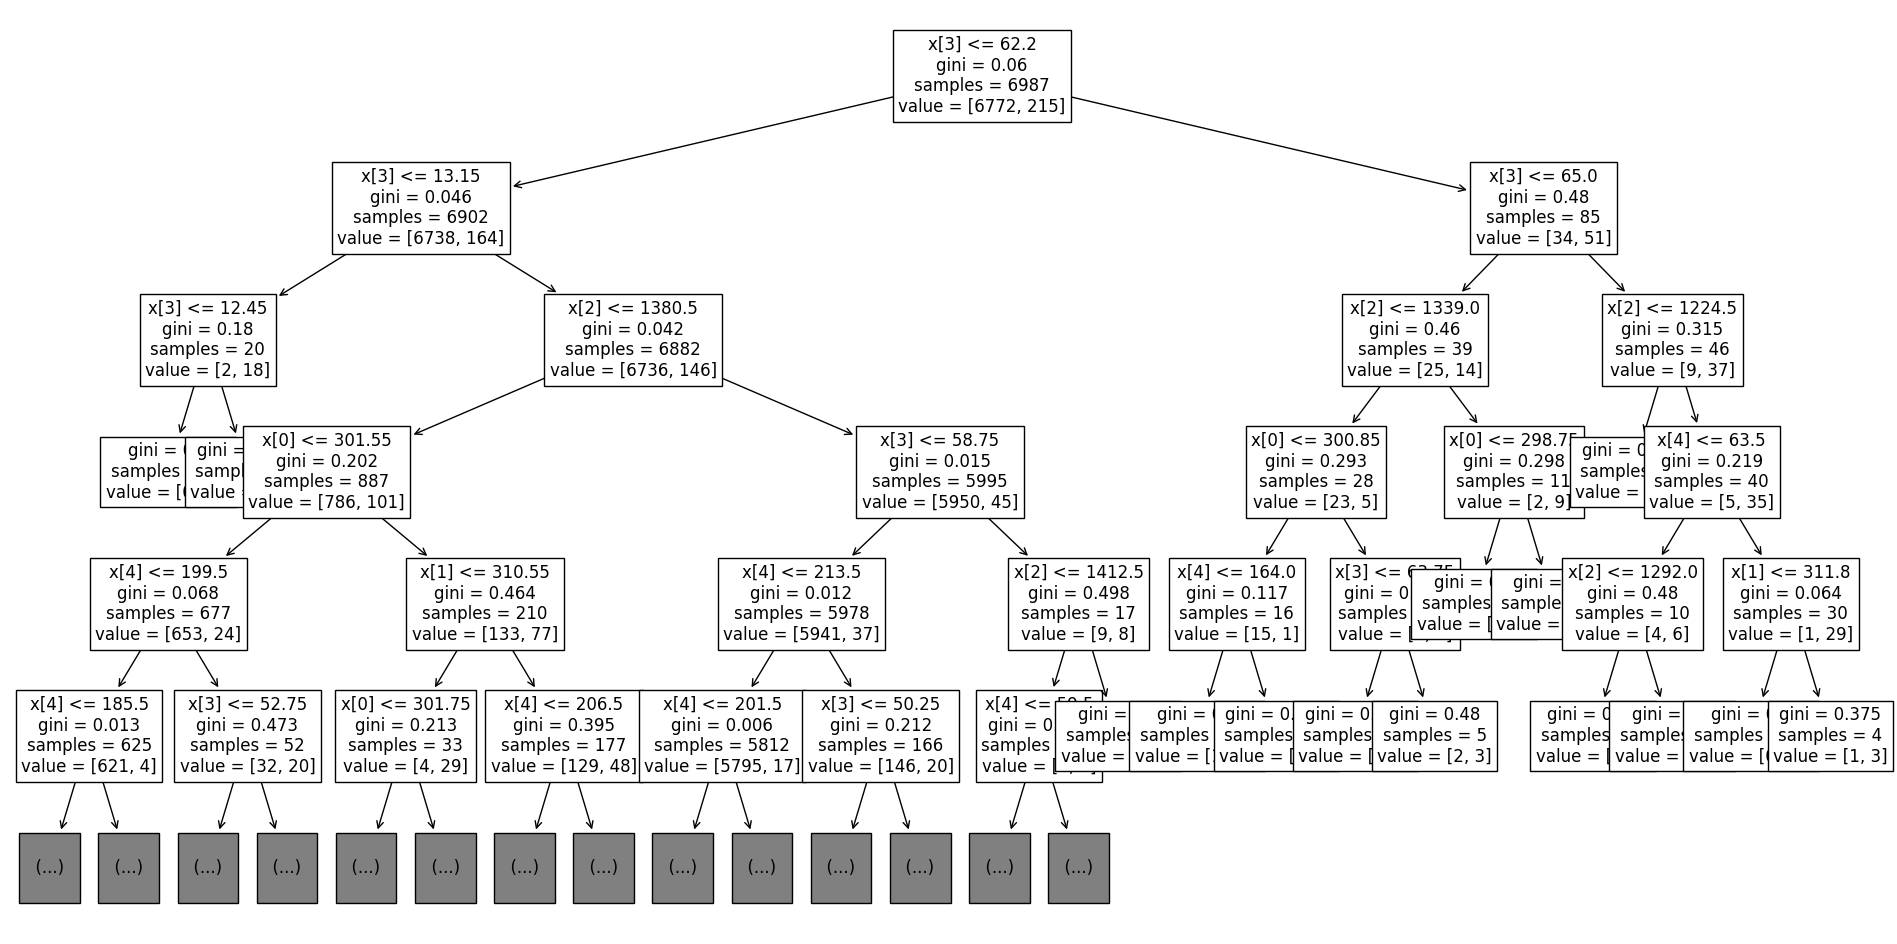

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24,12))
plot_tree(dt_clf, max_depth=5, fontsize=12)
plt.show()

In [ ]:
pred_test = dt_clf.predict(X_test)
pred_train = dt_clf.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('test 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))
print('train 정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))

test 정확도: 0.9766
train 정확도: 0.9861


In [ ]:
## 교차검증
scores = cross_val_score(dt_clf,X_train,y_train,
scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9833 0.9845 0.9772]
평균 검증 정확도: 0.9817
